# Logistic Regression

![Namespace Labs](../../../labs.png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gender.csv')

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
Favorite Color          66 non-null object
Favorite Music Genre    66 non-null object
Favorite Beverage       66 non-null object
Favorite Soft Drink     66 non-null object
Gender                  66 non-null object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,M
freq,37,19,14,32,33


In [6]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [7]:
cats = ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender']

In [8]:
df_final = pd.get_dummies(df, columns=cats,drop_first=True)

In [9]:
df_final.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender_M
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [10]:
X = df_final.drop('Gender_M', axis=1)
y = df_final['Gender_M']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression(random_state=42)

In [14]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [17]:
accuracy_score(predictions, y_test)

0.65

In [18]:
confusion_matrix(predictions, y_test)

array([[6, 1],
       [6, 7]])

In [19]:
from sklearn.metrics import plot_confusion_matrix

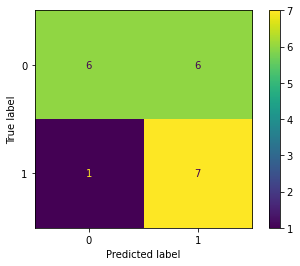

In [20]:
plot_confusion_matrix(model,X_test,y_test)

In [21]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.88      0.54      0.67        13

    accuracy                           0.65        20
   macro avg       0.69      0.70      0.65        20
weighted avg       0.74      0.65      0.65        20



Happy coding!